<a href="https://colab.research.google.com/github/FrogyKing/MBAIA/blob/main/Principales_tecnologias_de_la_IA/sesion5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Computer Vision
# Alumno: Luis Gonzalez

In [1]:
!pip install transformers pillow torch torchvision --quiet

In [2]:
from transformers import pipeline
from PIL import Image
import os, matplotlib.pyplot as plt
import google.generativeai as genai

In [3]:
# API DE GEMINI
from google.colab import userdata
import google.generativeai as genai
API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=API_KEY)

In [ ]:
clf = pipeline("image-classification", model="google/vit-base-patch16-224")

In [5]:
CARPETA = "capturas"
os.makedirs(CARPETA, exist_ok=True)

In [6]:
def obtener_forma_comun(objeto):
    prompt = f"""
    Dime la forma geométrica más común del objeto '{objeto}'.
    Solo responde con una palabra entre estas:
    ['circular', 'rectangular', 'cuadrada', 'cilíndrica', 'esférica', 'triangular', 'ovalada', 'irregular'].
    Si el objeto no tiene una forma común definida, responde 'irregular'.
    """
    model = genai.GenerativeModel("gemini-2.0-flash")
    response = model.generate_content(prompt)
    return response.text.strip().lower()

In [7]:
def traducir_al_espanol(texto):
    prompt = f"Traduce al español el siguiente texto, pero solo devuelve la traducción sin explicaciones: '{texto}'"
    model = genai.GenerativeModel("gemini-2.0-flash")
    response = model.generate_content(prompt)
    return response.text.strip()

In [8]:
def traducir_al_espanol(texto):
    prompt = f"Traduce al español el siguiente texto, pero solo devuelve la traducción sin explicaciones: '{texto}'"
    model = genai.GenerativeModel("gemini-2.0-flash")
    response = model.generate_content(prompt)
    return response.text.strip()

In [9]:
def analizar_y_guardar(imagen_path, resultados):
    image = Image.open(imagen_path)
    preds = clf(image)

    objeto_en = preds[0]['label'].split(",")[0].strip()
    score = preds[0]['score']
    objeto_es = traducir_al_espanol(objeto_en)
    forma = obtener_forma_comun(objeto_en)

    resultados.append({
        "imagen": os.path.basename(imagen_path),
        "objeto_en": objeto_en,
        "objeto_es": objeto_es,
        "forma": forma,
        "confianza": score
    })

    print(f"Imagen: {os.path.basename(imagen_path)}")
    print(f"Objeto: {objeto_es} ({objeto_en})")
    print(f"Forma común: {forma}")
    print(f"Confianza: {score:.2%}\n")

In [10]:
def analizar_todas_las_imagenes(carpeta=CARPETA):
    resultados = []
    imagenes = [f for f in os.listdir(carpeta) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not imagenes:
        print("No hay imágenes en la carpeta.")
        return []

    print(f"Analizando {len(imagenes)} imágenes...\n")
    for img in imagenes:
        analizar_y_guardar(os.path.join(carpeta, img), resultados)
    print("Análisis completo.")
    return resultados

In [11]:
def mostrar_histograma(resultados):
    if not resultados:
        print("No hay resultados para graficar.")
        return
    formas = [r["forma"] for r in resultados]
    plt.figure(figsize=(6,4))
    plt.hist(formas, bins=len(set(formas)), rwidth=0.8)
    plt.title("Distribución de formas detectadas")
    plt.xlabel("Forma")
    plt.ylabel("Frecuencia")
    plt.grid(True, alpha=0.3)
    plt.show()

In [12]:
def limpiar_carpeta_y_resultados():
    for f in os.listdir(CARPETA):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            os.remove(os.path.join(CARPETA, f))
    print("Carpeta y resultados limpiados. Puedes subir nuevas fotos.")

In [13]:
resultados = analizar_todas_las_imagenes()

Analizando 3 imágenes...

Imagen: WIN_20251029_19_58_01_Pro.jpg
Objeto: Sobre (envelope)
Forma común: rectangular
Confianza: 77.95%

Imagen: WIN_20251029_19_58_06_Pro.jpg
Objeto: Tiritas (Band Aid)
Forma común: ovalada
Confianza: 21.88%

Imagen: WIN_20251029_19_58_30_Pro.jpg
Objeto: Botella de agua (water bottle)
Forma común: cilíndrica
Confianza: 43.39%

Análisis completo.


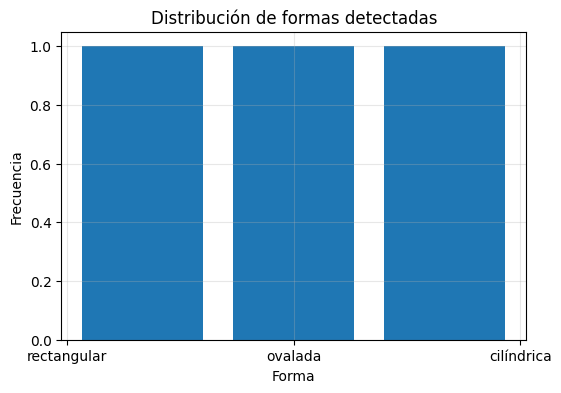

In [14]:
mostrar_histograma(resultados)